## Importing Libraries and Datasets

In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [36]:
tweets_df= pd.read_csv('twitter.csv')

In [37]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [38]:
tweets_df= tweets_df.drop(['id'], axis=1)

## Exploring the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E71B69C48>]],
      dtype=object)

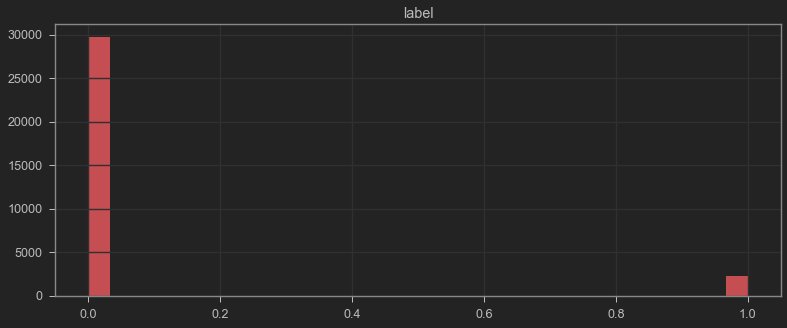

In [39]:
tweets_df.hist(bins=30, figsize=(13, 5), color= 'r')

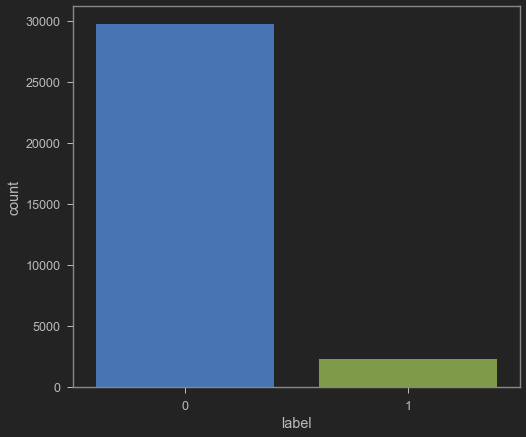

In [40]:
sb.countplot(tweets_df['label'], label= 'Count')

In [42]:
tweets_df['length']= tweets_df['tweet'].apply(len)

In [43]:
positive= tweets_df[tweets_df['label']==0]
negative= tweets_df[tweets_df['label']==1]

## Plotting the WordCloud

In [44]:
sentences= tweets_df['tweet'].tolist()

In [45]:
single_sentence= " ".join(sentences)

In [47]:
from wordcloud import WordCloud

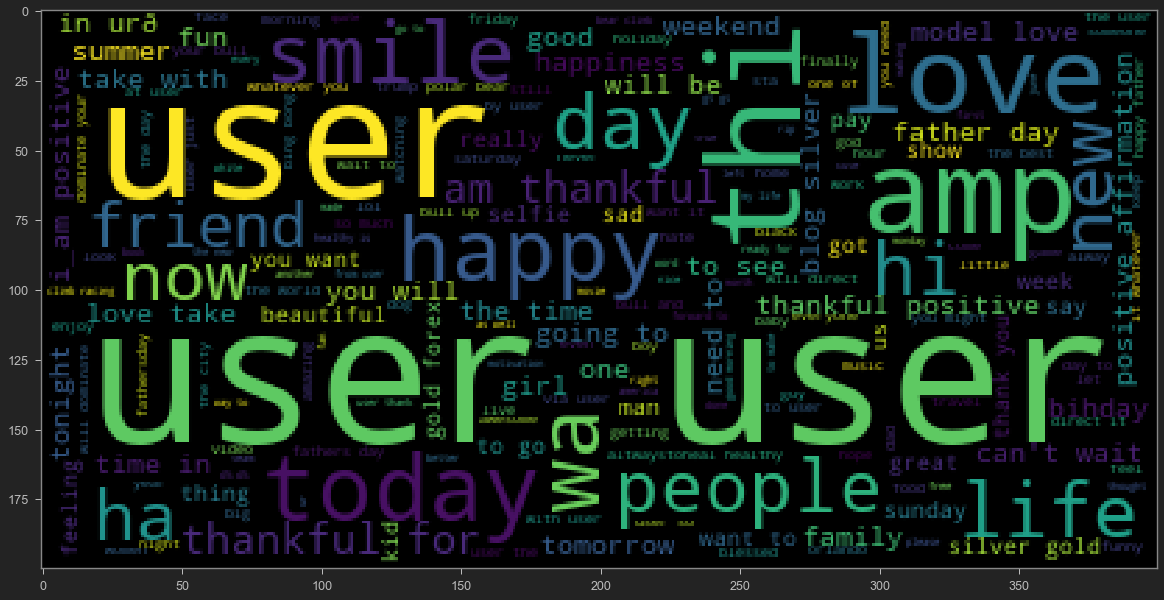

In [49]:
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(single_sentence))

## Cleaning the Data
Removing punctuations and stopwords

In [57]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Siddhesh
[nltk_data]     Menon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
def message_cleaning(message):
    
    #Removing punctuation from string passed based on string library
    punctuation_removed= [char for char in message if char not in string.punctuation]
    
    #Joining the characters to form words
    punctuation_removed_join= ''.join(punctuation_removed)
    
    #Removing Stopwords
    punctuation_removed_join_clean= [word for word in punctuation_removed_join.split() if word.lower() not in stopwords.words('english')]
    
    return punctuation_removed_join_clean

In [54]:
#Applying above cleaning function to the tweets
tweets_cleaned= tweets_df['tweet'].apply(message_cleaning)
tweets_cleaned

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuðððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object

In [58]:
#Applying Count Vectorization
vectorizer= CountVectorizer(analyzer= message_cleaning)
tweets_coutvectorizer= CountVectorizer(analyzer= message_cleaning, dtype='uint8').fit_transform(tweets_df['tweet']).toarray()

In [61]:
X= tweets_coutvectorizer
y= tweets_df['label']

## Preparing a Naive Bayes Classifier

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

In [64]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier= MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Test trained model

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

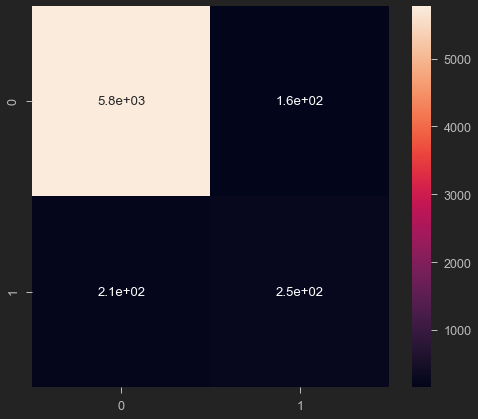

In [67]:
#Predicting the Test set results
y_predict_test= NB_classifier.predict(X_test)

#Plotting confusion matrix to check for accuracy
cm= confusion_matrix(y_test, y_predict_test)
sb.heatmap(cm, annot=True)

### In the Test Set:
* The model has correctly classified 5800 tweets as positive and 2500 tweets as negative
* It has incorrectly classified 160 tweets as positive and 210 tweets as negative

In [68]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5933
           1       0.61      0.54      0.57       460

    accuracy                           0.94      6393
   macro avg       0.79      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

